In [65]:
import pandas as pd

In [66]:
data = pd.read_csv('data/machine.data.txt', header=None)
data.columns = ['vendor', 'model', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax',
             'prp', 'erp']

In [67]:
data.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


# Analyze Data

In [68]:
# Check null
data.isnull().sum()

vendor    0
model     0
myct      0
mmin      0
mmax      0
cach      0
chmin     0
chmax     0
prp       0
erp       0
dtype: int64

In [69]:
# Checking no. of unique value per feature, if nunique <= 1, drop feature
data.nunique()

vendor     30
model     209
myct       60
mmin       25
mmax       23
cach       22
chmin      15
chmax      31
prp       116
erp       104
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  209 non-null    object
 1   model   209 non-null    object
 2   myct    209 non-null    int64 
 3   mmin    209 non-null    int64 
 4   mmax    209 non-null    int64 
 5   cach    209 non-null    int64 
 6   chmin   209 non-null    int64 
 7   chmax   209 non-null    int64 
 8   prp     209 non-null    int64 
 9   erp     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [71]:
data['vendor'].value_counts()

ibm             32
nas             19
honeywell       13
ncr             13
sperry          13
siemens         12
cdc              9
amdahl           9
burroughs        8
harris           7
dg               7
hp               7
dec              6
ipl              6
c.r.d            6
magnuson         6
formation        5
cambex           5
prime            5
perkin-elmer     3
nixdorf          3
gould            3
apollo           2
bti              2
wang             2
basf             2
adviser          1
sratus           1
four-phase       1
microdata        1
Name: vendor, dtype: int64

We can see that barring the first two variables rest are numeric in nature. Let’s only pick the numeric fields.

In [72]:
categorical_ = data.iloc[:,:2]
numerical_ = data.iloc[:,2:]
numerical_.head()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [73]:
data.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


# Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

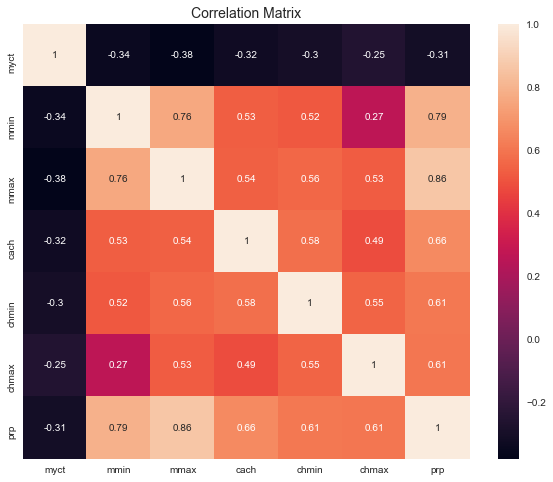

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

plt.figure(figsize=(10, 8))
# here we excluded erp, as it's the estimated relative performance values estimated by other authors
sns.heatmap(data[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp']].corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14)

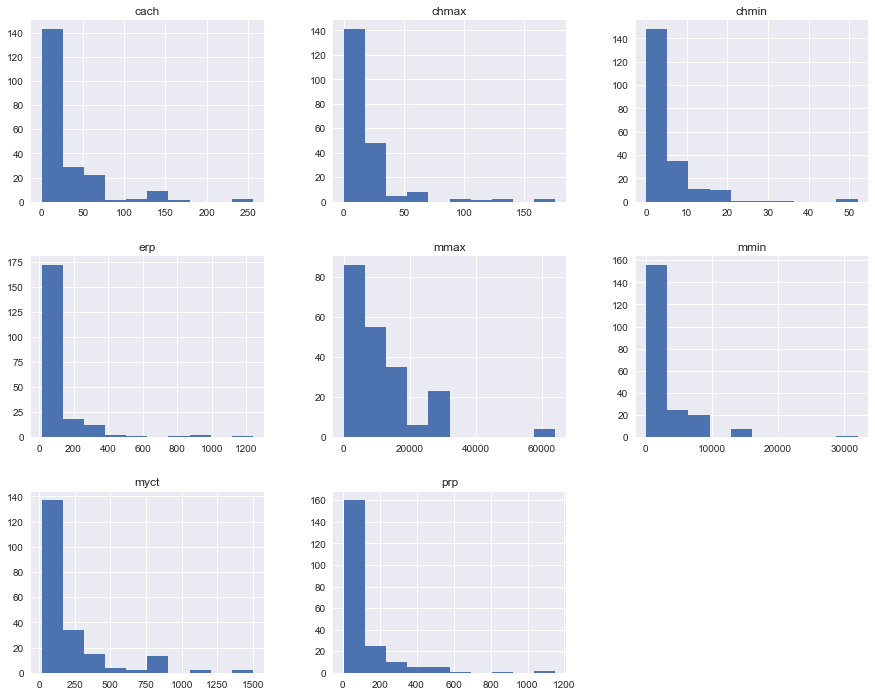

In [75]:
# Since the dimensions are small lets do a pairplot and visualise their distribution

data.hist()
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

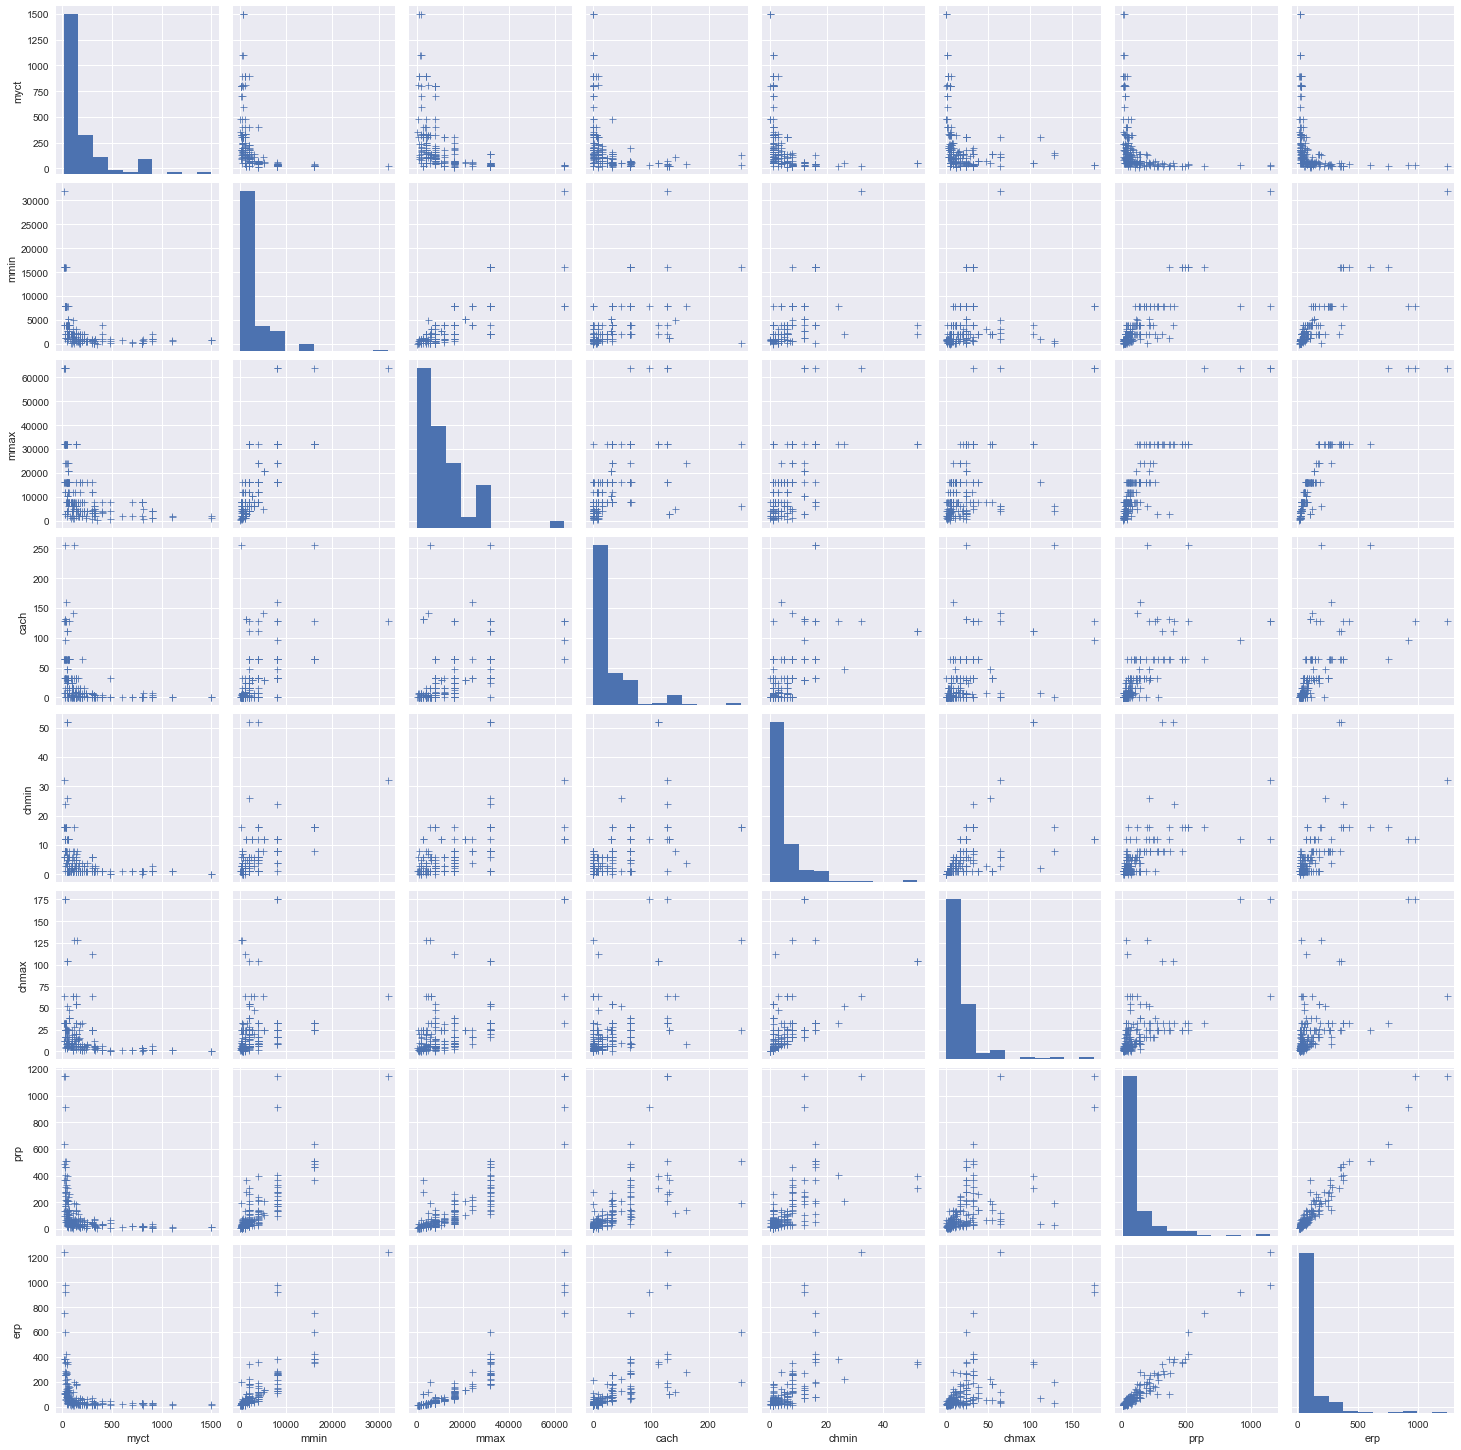

In [76]:
pairplot = sns.pairplot(df, markers='+')
plt.show()

We can see that the dataset features should be normalized so that the data is centered around the mean and has unit standard deviation.

In [77]:
# Select the predictor and target variables
X = numerical_.iloc[:,:-1]
y = numerical_.iloc[:,-1].astype(int)

In [78]:
# Split dataset into Train, Test sets
from sklearn.model_selection import train_test_split
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_training_set)

# Apply transform to both the training set and the test set.
x_training_set = scaler.transform(x_training_set)
x_test_set = scaler.transform(x_test_set)

In [80]:
y_training_set = y_training_set.values.reshape(-1, 1)
y_test_set  = y_test_set.values.reshape(-1, 1)

y_scaler = StandardScaler()
# Fit on training set only.
y_scaler.fit(y_training_set)

# Apply transform to both the training set and the test set.
y_training_set = y_scaler.transform(y_training_set)
y_test_set = y_scaler.transform(y_test_set)

In [81]:
# Training/model fitting on Train set
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_training_set,y_training_set)

LinearRegression()

In [82]:
# Accuracy Testing
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction: ',model_score)
y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))


coefficient of determination R^2 of the prediction:  0.9583846753218253
Mean squared error: 0.39
Test Variance score: 0.93


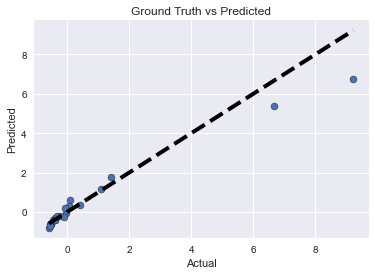

In [83]:
# Accuracy report with test data
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

- Analyze: We can see that our R2 score and MSE are both very good. This means that we have found a well-fitting model to predict the median price value of a house. There can be a further improvement to the metric by doing some preprocessing before fitting the data. 

In [93]:
# Because we dont use categorical features for this model, so we only need to keep the numerical parameters to make a prediction
X_new = [[29,8000,32000,32,8,32,172], [50,2000,32000,112,52,104,307]]

In [94]:
y_new = model.predict(X_new)
y_new

array([[12044.21692842],
       [11654.87450201]])